In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Distribution plots for Density feature is shown below


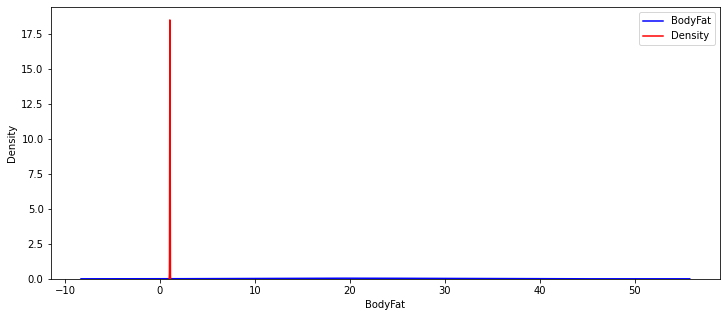

----------------------------------------------------------------------------------------------------
Distribution plots for BodyFat feature is shown below


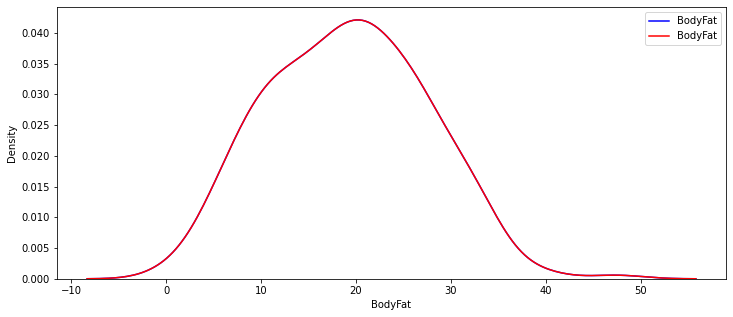

----------------------------------------------------------------------------------------------------
Distribution plots for Age feature is shown below


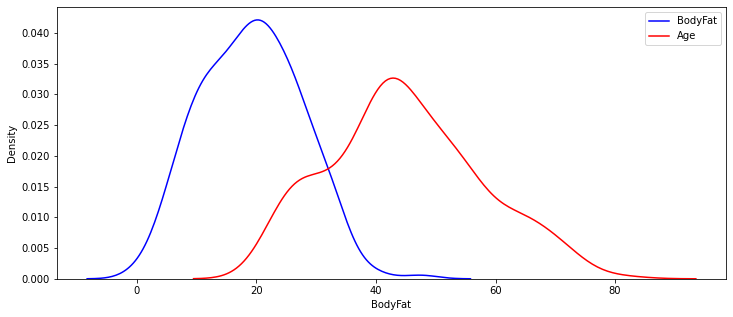

----------------------------------------------------------------------------------------------------
Distribution plots for Weight feature is shown below


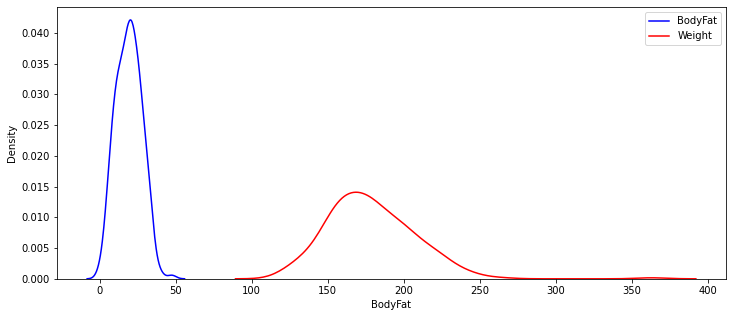

----------------------------------------------------------------------------------------------------
Distribution plots for Height feature is shown below


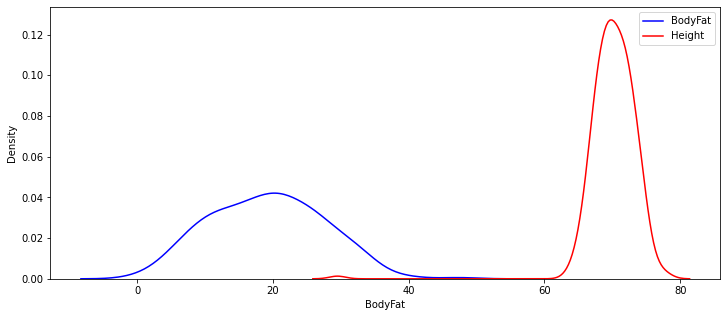

----------------------------------------------------------------------------------------------------
Distribution plots for Neck feature is shown below


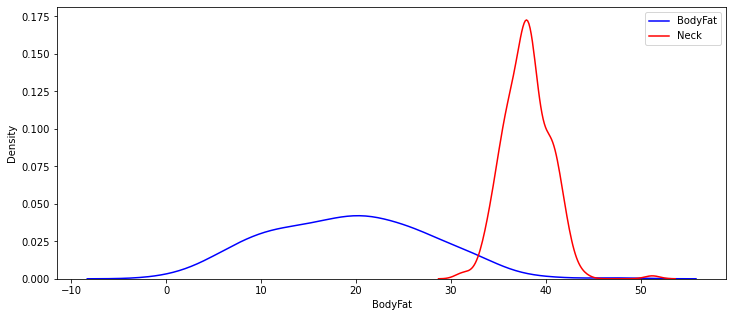

----------------------------------------------------------------------------------------------------
Distribution plots for Chest feature is shown below


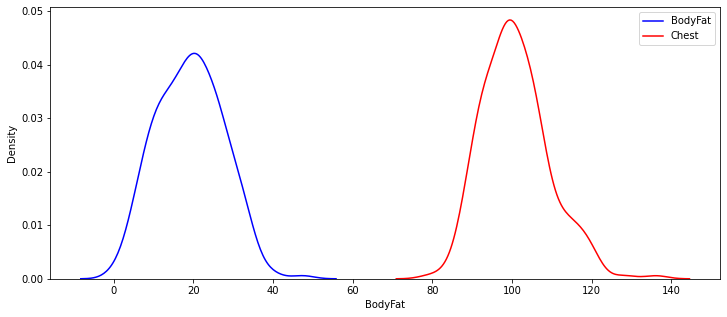

----------------------------------------------------------------------------------------------------
Distribution plots for Abdomen feature is shown below


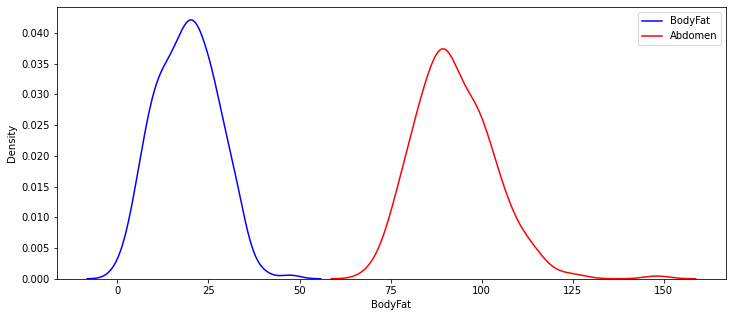

----------------------------------------------------------------------------------------------------
Distribution plots for Hip feature is shown below


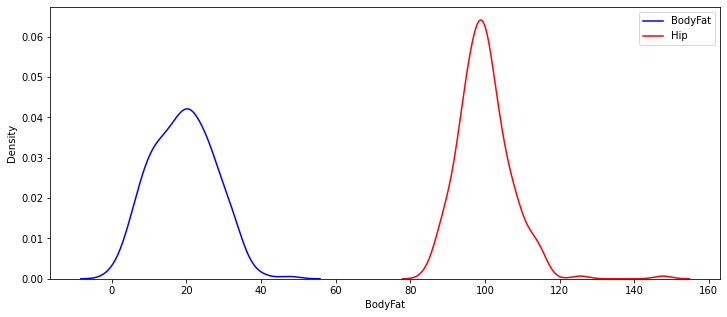

----------------------------------------------------------------------------------------------------
Distribution plots for Thigh feature is shown below


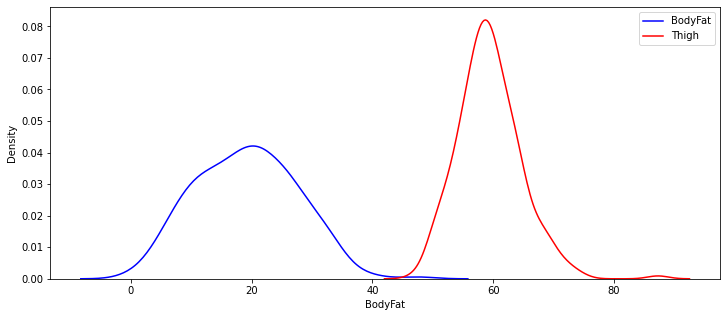

----------------------------------------------------------------------------------------------------
Distribution plots for Knee feature is shown below


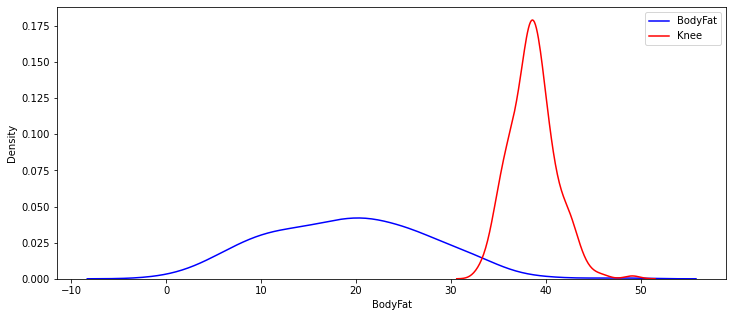

----------------------------------------------------------------------------------------------------
Distribution plots for Ankle feature is shown below


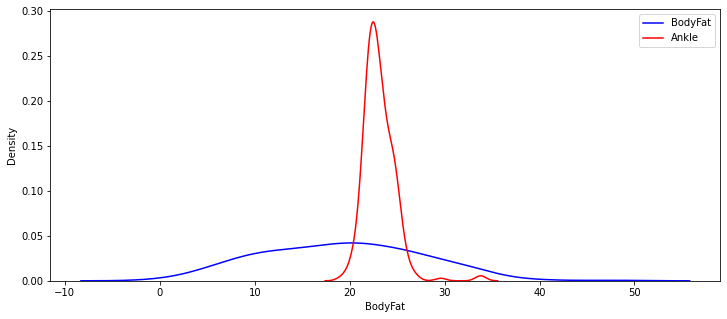

----------------------------------------------------------------------------------------------------
Distribution plots for Biceps feature is shown below


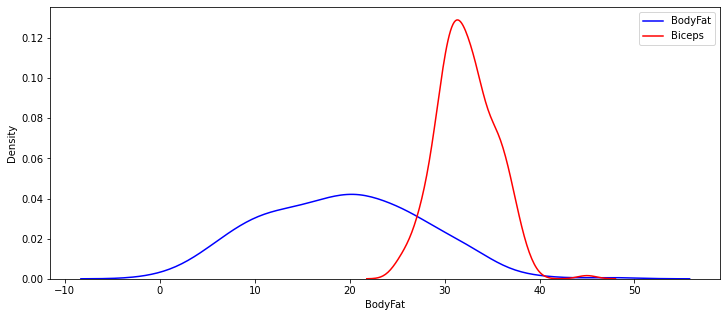

----------------------------------------------------------------------------------------------------
Distribution plots for Forearm feature is shown below


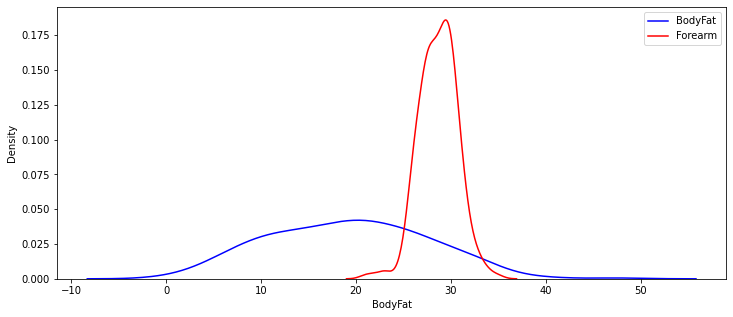

----------------------------------------------------------------------------------------------------
Distribution plots for Wrist feature is shown below


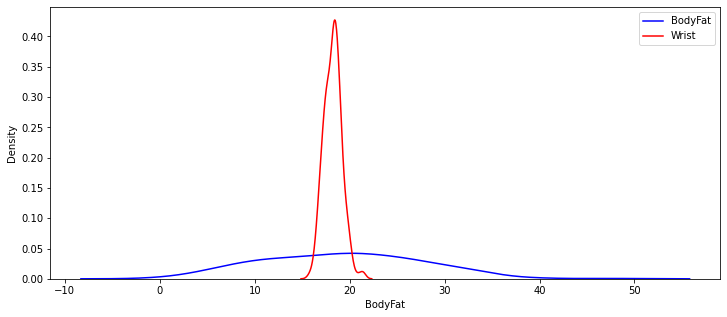

----------------------------------------------------------------------------------------------------


In [4]:
# checking which columns are helpful to predict the the result
def plotdistplz(col):
  plt.figure(figsize=(12,5))
  sn.kdeplot(df['BodyFat'], color = 'blue',label='BodyFat')
  sn.kdeplot(df[col], color = 'red',  label=col)
  plt.legend()
  plt.show()

cols = list(df.columns)
for i in cols:
  print(f'Distribution plots for {i} feature is shown below')
  plotdistplz(i)
  print('-'*100)

from above distribution plot we can consider the most reliable data which will help to predict data

In [5]:
# check data is distributed centraly or not

In [6]:
import scipy.stats as stats

Distribution plots for the feature Density are shown below


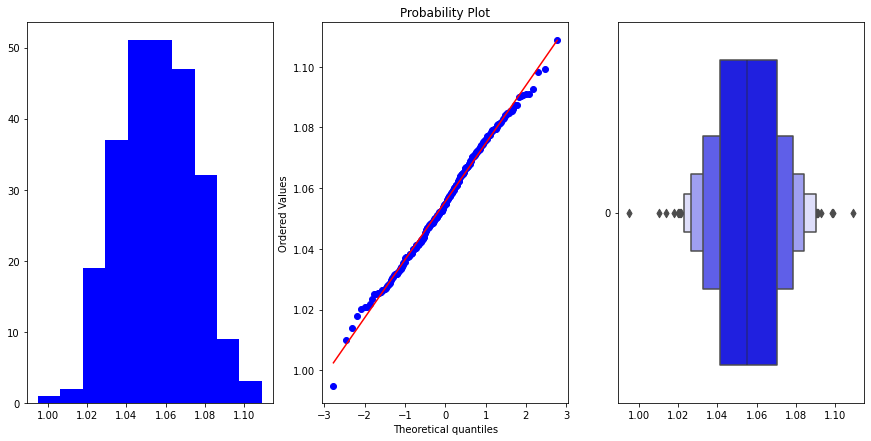

----------------------------------------------------------------------------------------------------
Distribution plots for the feature BodyFat are shown below


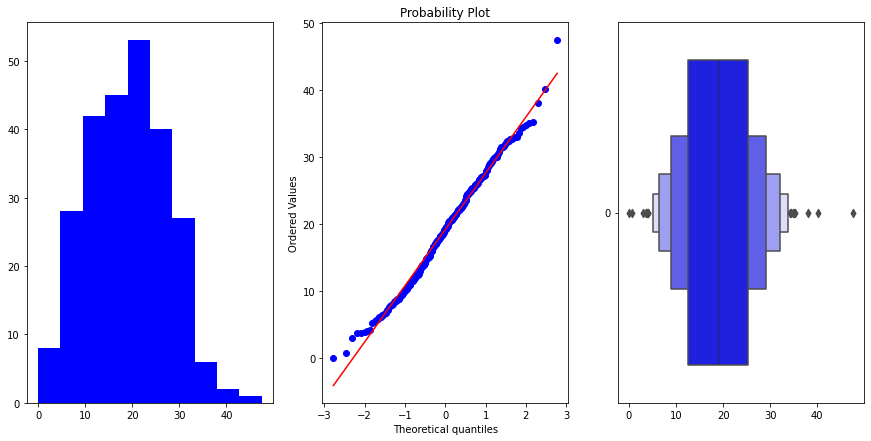

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Age are shown below


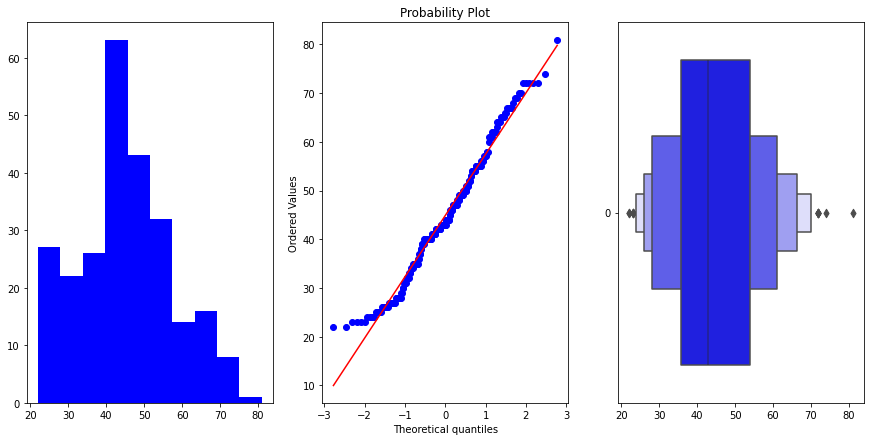

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Weight are shown below


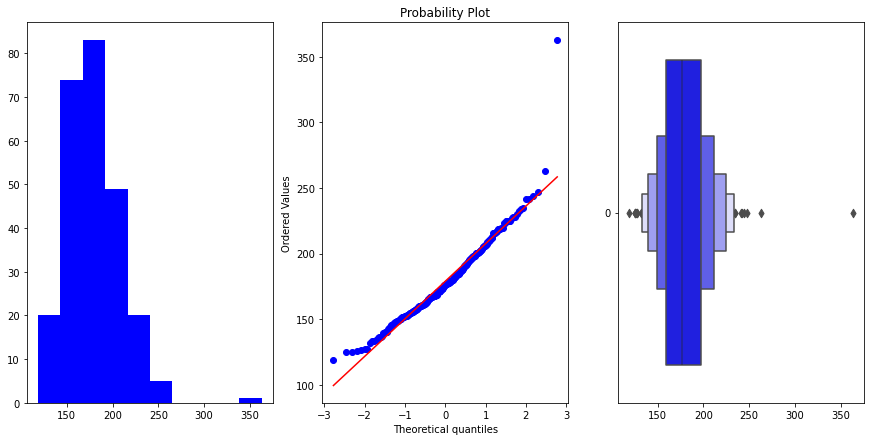

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Height are shown below


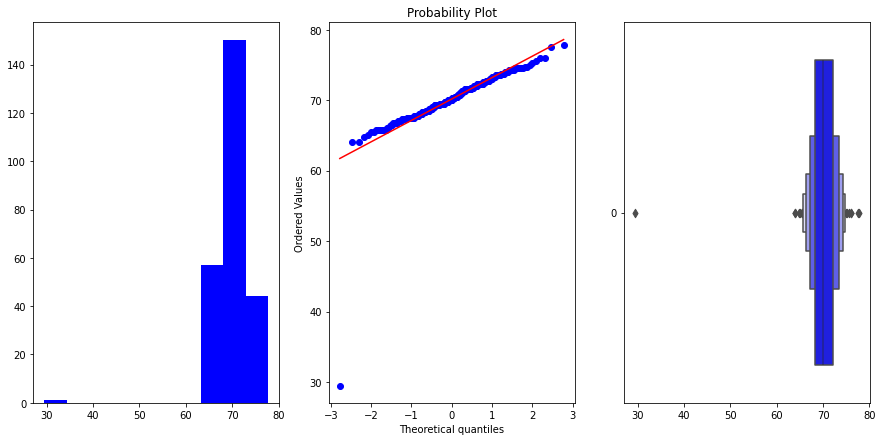

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Neck are shown below


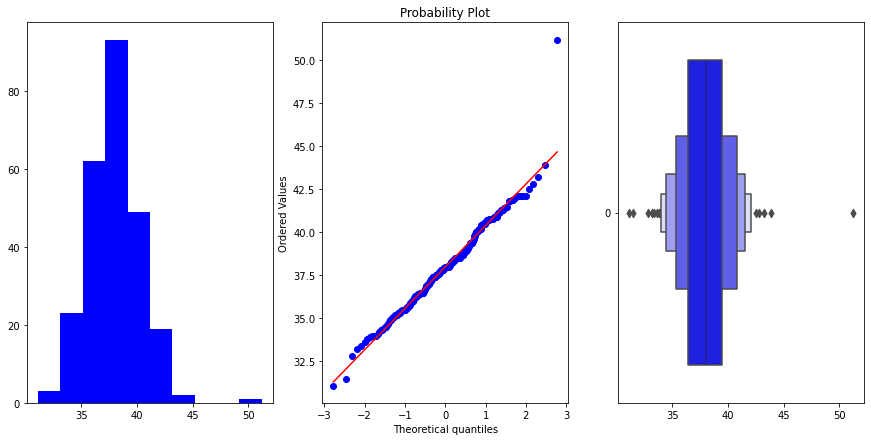

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Chest are shown below


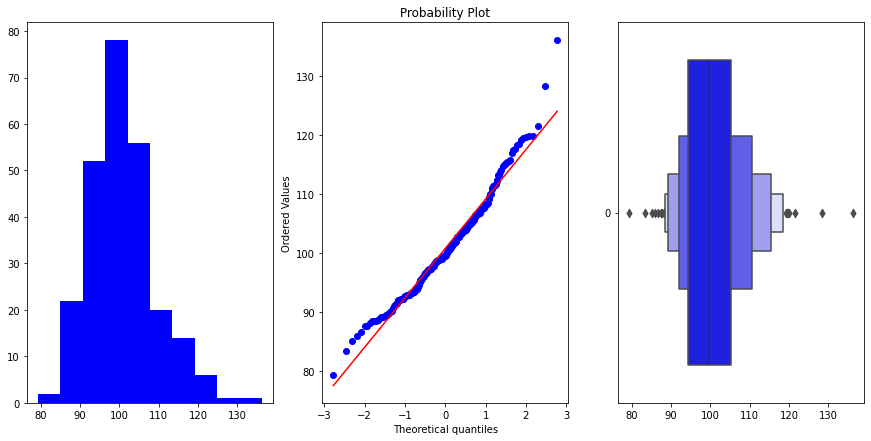

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Abdomen are shown below


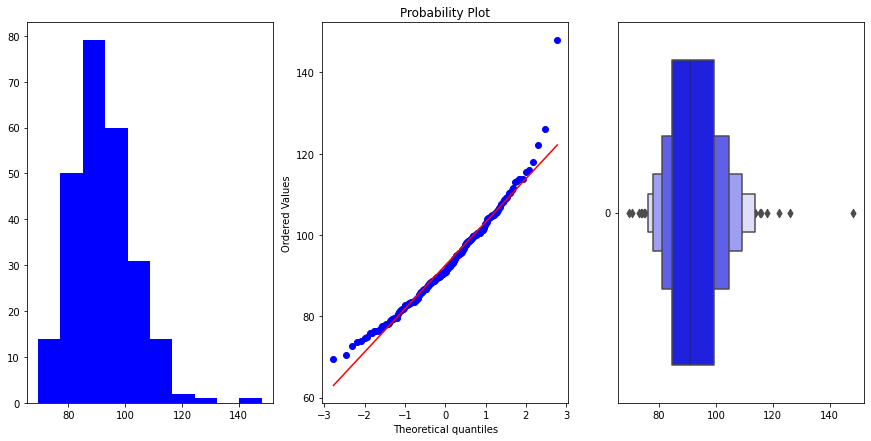

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Hip are shown below


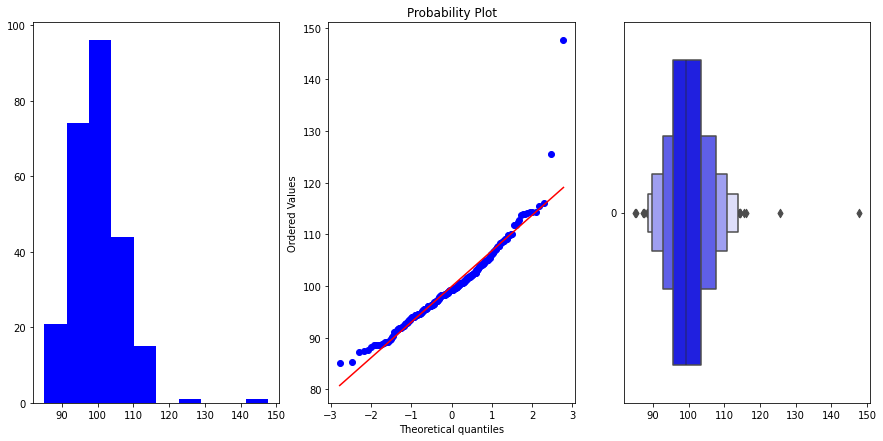

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Thigh are shown below


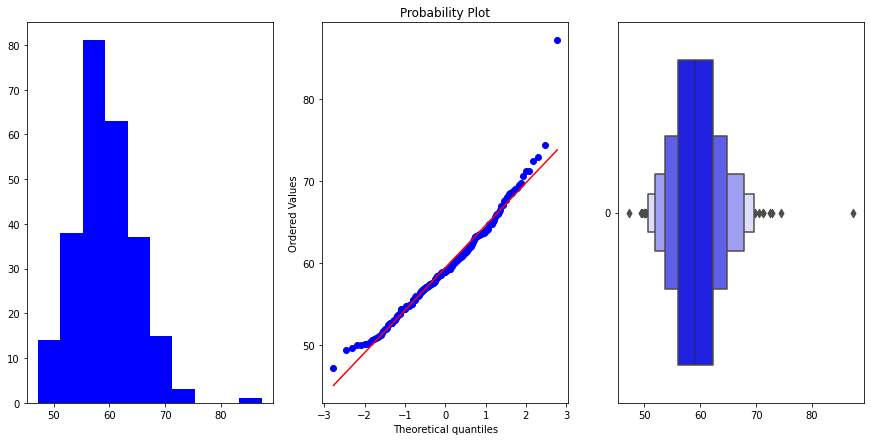

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Knee are shown below


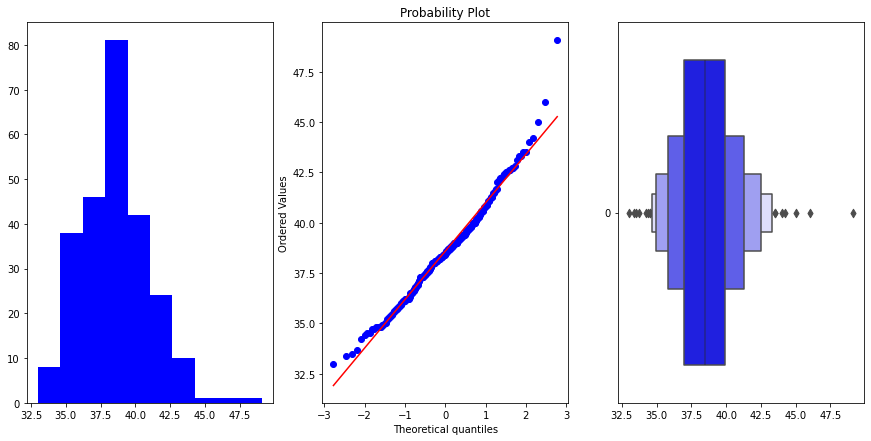

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Ankle are shown below


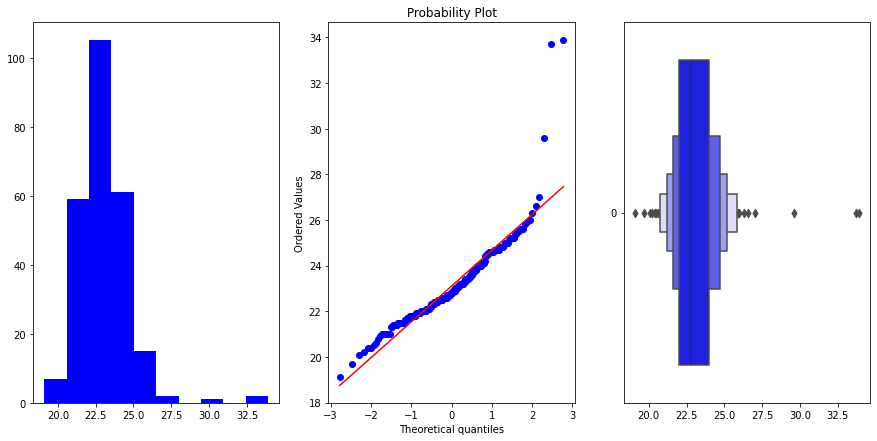

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Biceps are shown below


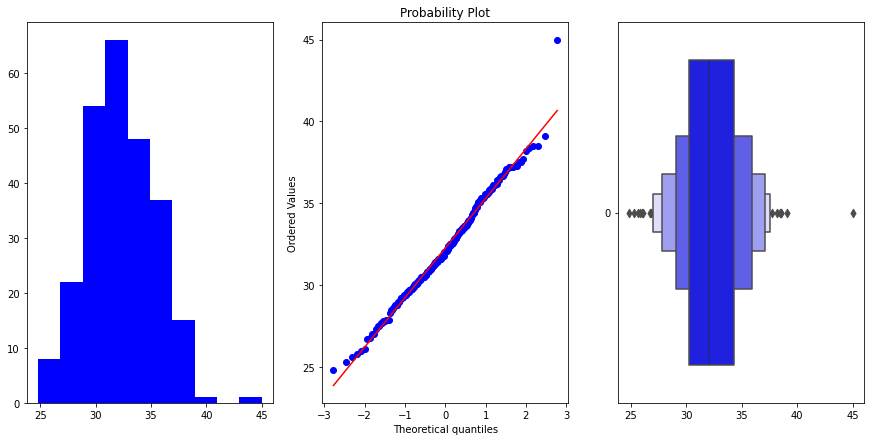

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Forearm are shown below


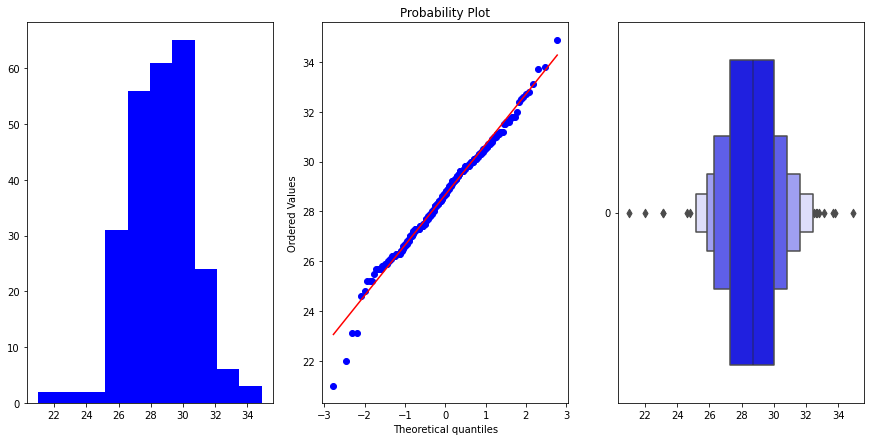

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Wrist are shown below


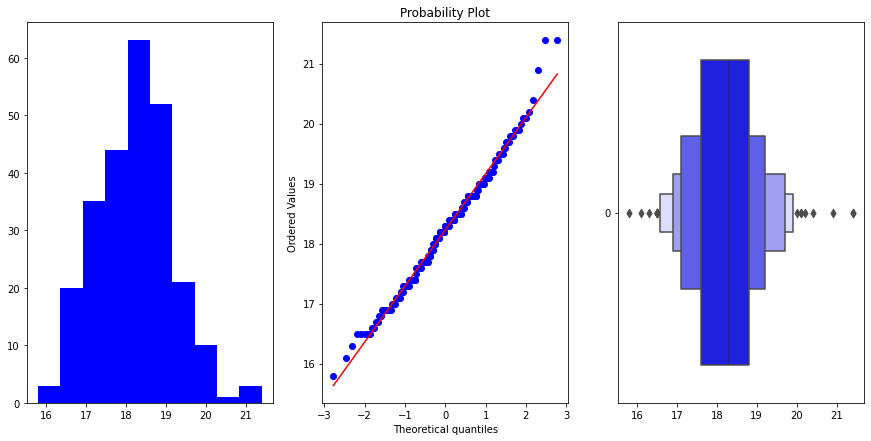

----------------------------------------------------------------------------------------------------


In [7]:
def drawplots(df,col):
  plt.figure(figsize=(15,7))
  plt.subplot(1,3,1)
  plt.hist(df[col], color='blue')

  plt.subplot(1,3,2)
  stats.probplot(df[col], dist='norm', plot=plt)

  plt.subplot(1,3,3)
  sn.boxenplot(data = df[col], orient='h', color = 'blue')

  plt.show()

cols = list(df.columns)

for i in cols:
  print(f'Distribution plots for the feature {i} are shown below')
  drawplots(df,i)
  print('-'*100)

we can see that every data is centraly distributed

In [8]:
#checking outliers

In [9]:
upperlimit = []
lowerlimit = []
for i in df.columns:
  upperlimit.append(df[i].mean()+(df[i].std())*4)
  lowerlimit.append(df[i].mean()-(df[i].std())*4)

In [10]:
cols= list(df.columns)
j=0
for i in cols:
  temp = df.loc[(df[i]>upperlimit[j])&(df[i]<lowerlimit[j])]

In [11]:
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


This means there is no out liers

In [12]:
#using extratrees regressor for feature selction

data =  df.copy()
y = data['BodyFat']
X = data.drop(['BodyFat'], axis = 1)

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
er = ExtraTreesRegressor()
er.fit(X,y)

ExtraTreesRegressor()

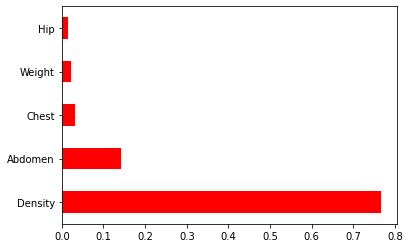

In [14]:
series = pd.Series(er.feature_importances_,index=X.columns)
series.nlargest(5).plot(kind = 'barh', color = 'red')

In [15]:
# Using Mutual Information gain for feature selection

from sklearn.feature_selection import mutual_info_regression
mr = mutual_info_regression(X, y)

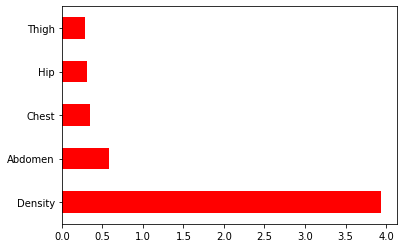

In [16]:
plotdata = pd.Series(mr, index=X.columns)
plotdata.nlargest(5).plot(kind = 'barh', color = 'red')

Removing correlation

In [17]:
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


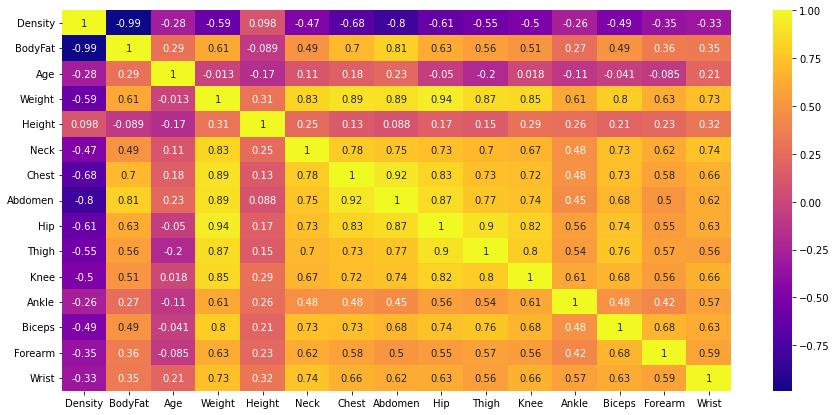

In [18]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(), annot=True,cmap='plasma')

In [19]:
def correlation(df, threshold):
  colcor = set()

  cormat = df.corr()

  for i in range(len(cormat)):
    for j in range(i):

      if abs(cormat.iloc[i][j]) > threshold:
        colname = cormat.columns[i]
        colcor.add(colname)
  return colcor

ans = correlation(X, threshold = 0.85)
ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [20]:
columns = ['Density','Chest','Abdomen','Weight','Hip']

In [21]:
X_new = X[columns]

In [22]:
X_new

,Density,Chest,Abdomen,Weight,Hip
0,1.0708,93.1,85.2,154.25,94.5
1,1.0853,93.6,83.0,173.25,98.7
2,1.0414,95.8,87.9,154.00,99.2
3,1.0751,101.8,86.4,184.75,101.2
4,1.0340,97.3,100.0,184.25,101.9
...,...,...,...,...,...
247,1.0736,89.2,83.6,134.25,88.8
248,1.0236,108.5,105.0,201.00,104.5
249,1.0328,111.1,111.5,186.75,101.7
250,1.0399,108.3,101.3,190.75,97.8


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.5, random_state = 0)

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 8, random_state = 0)
regressor.fit(X_train.values, y_train)

RandomForestRegressor(n_estimators=8, random_state=0)

In [25]:
y_pred = regressor.predict(X_test.values)
np.set_printoptions(precision=0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[11. 12.]
 [27. 27.]
 [ 5.  3.]
 [20. 20.]
 [ 9.  9.]
 [23. 24.]
 [26. 26.]
 [25. 25.]
 [26. 26.]
 [27. 27.]
 [25. 25.]
 [15. 15.]
 [21. 21.]
 [20. 20.]
 [17. 16.]
 [12. 14.]
 [16. 17.]
 [ 6.  1.]
 [10. 10.]
 [11. 11.]
 [20. 20.]
 [13. 14.]
 [30. 30.]
 [22. 22.]
 [19. 20.]
 [32. 32.]
 [ 5.  4.]
 [23. 23.]
 [22. 22.]
 [28. 28.]
 [30. 30.]
 [27. 27.]
 [28. 28.]
 [12. 12.]
 [36. 34.]
 [13. 14.]
 [23. 24.]
 [21. 21.]
 [15. 16.]
 [11. 11.]
 [18. 18.]
 [21. 21.]
 [38. 35.]
 [22. 22.]
 [20. 20.]
 [15. 15.]
 [12. 12.]
 [ 8.  8.]
 [32. 32.]
 [ 6.  0.]
 [ 9.  9.]
 [14. 13.]
 [22. 22.]
 [ 9.  9.]
 [25. 25.]
 [13. 13.]
 [17. 17.]
 [16. 16.]
 [29. 26.]
 [21. 21.]
 [ 9. 10.]
 [11. 12.]
 [12. 12.]
 [14. 14.]
 [15. 15.]
 [15. 15.]
 [21. 21.]
 [17. 17.]
 [32. 31.]
 [15. 15.]
 [33. 30.]
 [19. 20.]
 [ 9.  8.]
 [29. 29.]
 [ 9. 10.]
 [13. 18.]
 [18. 18.]
 [ 8.  8.]
 [29. 29.]
 [20. 20.]
 [30. 30.]
 [13. 14.]
 [ 8.  8.]
 [21. 22.]
 [ 8.  8.]
 [16. 16.]
 [21. 21.]
 [12. 11.]
 [38. 34.]
 [21. 21.]
 [11. 10.]

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9761406022740942

In [27]:
X_new = X[columns]
y = data['BodyFat']
predicted = regressor.predict(X_new.values)

X_new['Actual Result'] = y
X_new['Predicted Result'] = predicted
X_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Density,Chest,Abdomen,Weight,Hip,Actual Result,Predicted Result
0,1.0708,93.1,85.2,154.25,94.5,12.3,12.3125
1,1.0853,93.6,83.0,173.25,98.7,6.1,6.1750
2,1.0414,95.8,87.9,154.00,99.2,25.3,25.6375
3,1.0751,101.8,86.4,184.75,101.2,10.4,10.7375
4,1.0340,97.3,100.0,184.25,101.9,28.7,28.9875
...,...,...,...,...,...,...,...
247,1.0736,89.2,83.6,134.25,88.8,11.0,10.0625
248,1.0236,108.5,105.0,201.00,104.5,33.6,33.2875
249,1.0328,111.1,111.5,186.75,101.7,29.3,29.5625
250,1.0399,108.3,101.3,190.75,97.8,26.0,25.8875


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


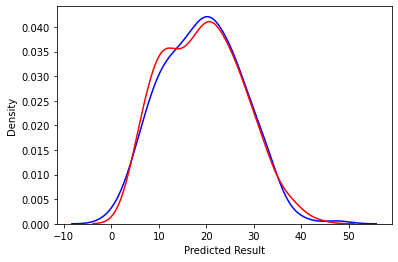

In [28]:
sn.distplot(X_new['Actual Result'], label = 'Actual Result', hist=False, color = 'blue')
sn.distplot(X_new['Predicted Result'], label = 'Predicted Result', hist=False, color = 'Red')

In [29]:
r2_score(X_new['Actual Result'],X_new['Predicted Result'])

0.9841042042931282

In [30]:
import pickle
file = open('bodyfatmodel.pkl','wb')
pickle.dump(regressor, file)
file.close()